## Student Name: 
## Student Email:

# Project 3: The Smart City Slicker

Imagine you are a stakeholder in a rising Smart City and want to know more about themes and concepts about existing smart cities. You also want to know where does your smart city place among others. In this project, you will perform 
exploratory data analysis, often shortened to EDA, to examine a data from the [2015 Smart City Challenge](https://www.transportation.gov/smartcity) to find facts about the data and communicating those facts through text analysis and visualizations.

In order to explore the data and visualize it, some modifications might need to be made to the data along the way. This is often referred to as data preprocessing or cleaning.
Though data preprocessing is technically different from EDA, EDA often exposes problems with the data that need to be fixed in order to continue exploring.
Because of this tight coupling, you have to clean the data as necessary to help understand the data.

In this project, you will apply your knowledge about data cleaning, machine learning, visualizations, and databases to explore smart city applications.

**Part 1** of the notebook will explore and clean the data. \
**Part 2** will take the results of the preprocessed data to create models and visualizations.

Empty cells are code cells. 
Cells denoted with [Your Answer Here] are markdown cells.
Edit and add as many cells as needed.

Output file for this notebook is shown as a table for display purposes. Note: The city name can be Norman, OK or OK Norman.

| city | raw text | clean text | clusterid | topicids | summary | keywords|
| -- | -- | -- | -- | -- | -- | -- |
|Norman, OK | Test, test , and testing. | test test test | 0 | T1, T2| test | test |

## Introduction
The Dataset: 2015 Smart City Challenge Applicants (non-finalist).
In this project you will use the applicant's PDFs as a dataset.
The dataset is from the U.S Department of Transportation Smart City Challenge.

On the website page for the data, you can find some basic information about the challenge. This is an interesting dataset. Think of the questions that you might be able to answer! A few could be:

1. Can I identify frequently occurring words that could be removed during data preprocessing?
2. Where are the applicants from?
3. Are there multiple entries for the same city in different applicantions?
4. What are the major themes and concepts from the smart city applicants?

Let's load the data!

## Loading and Handling files

Load data from `smartcity/`. 

To extract the data from the pdf files, use the [pypdf.pdf.PdfFileReader](https://pypdf.readthedocs.io/en/stable/index.html) class.
It will allow you to extract pages and pdf files and add them to a data structure (dataframe, list, dictionary, etc).
To install the module, use the command `pipenv install pypdf`.
You only need to handle PDF files, handling docx is not necessary.

In [11]:
import pypdf
import pandas as pd
import pypdf
import re
import glob
import os
import numpy as np

Create a data structure to add the city name and raw text. You can choose to split the city name from the file.

In [12]:
df2 = pd.DataFrame(columns = ['City','Text'])
#your full path of directory
mypath = "smartcity"
for file in glob.glob(mypath + "/*.pdf"):
    print(file)
    text2=''
    if file.endswith('.pdf'):
        pdf = pypdf.PdfReader(file)
        for i in range(len(pdf.pages)):
            page = pdf.pages[i]
            text2 = text2 + page.extract_text().strip()
        df2.loc[len(df2)+1] = [file,text2]
            

smartcity\AK Anchorage.pdf
smartcity\AL Birmingham.pdf
smartcity\AL Montgomery.pdf
smartcity\AZ Scottsdale AZ.pdf
smartcity\AZ Tucson.pdf
smartcity\CA Chula Vista.pdf
smartcity\CA Fremont.pdf
smartcity\CA Fresno.pdf
smartcity\CA Long Beach.pdf
smartcity\CA Moreno Valley.pdf
smartcity\CA Oakland.pdf
smartcity\CA Oceanside.pdf
smartcity\CA Riverside.pdf
smartcity\CA Sacramento.pdf
smartcity\CA San Jose_0.pdf
smartcity\CT NewHaven.pdf
smartcity\DC_0.pdf
smartcity\FL Jacksonville.pdf
smartcity\FL Miami.pdf
smartcity\FL Orlando.pdf
smartcity\FL St. Petersburg.pdf
smartcity\FL Tallahassee.pdf
smartcity\FL Tampa.pdf
smartcity\GA Atlanta.pdf
smartcity\GA Brookhaven.pdf
smartcity\IA Des Moines.pdf
smartcity\IN Indianapolis.pdf
smartcity\KY Louisville.pdf
smartcity\LA Baton Rouge.pdf
smartcity\LA New Orleans.pdf
smartcity\LA Shreveport.pdf
smartcity\MA Boston.pdf
smartcity\MD Baltimore.pdf
smartcity\MI Detroit.pdf
smartcity\MI Port Huron and Marysville.pdf
smartcity\MN Minneapolis St Paul.pdf
sm

In [13]:
def clean_title(city):
    city = city.replace('smartcity','').replace('.pdf','').replace('\\','')
    return city

In [14]:
Smart_City_Df = df2.copy()

In [15]:
Smart_City_Df['City'] = Smart_City_Df['City'].apply(clean_title)
Smart_City_Df['Text'].replace('', np.nan, inplace=True)

In [16]:
#Removed countries
removed_countries = list(Smart_City_Df[Smart_City_Df['Text'].isna()].City.values)
Smart_City_Df.dropna(inplace=True)

In [17]:
# Use the apply method with a lambda function to apply the re.sub method to the 'City' column
Smart_City_Df['clean'] = Smart_City_Df['Text'].apply(lambda x: re.sub(r'\n|\r', ' ', x))
Smart_City_Df['clean'] = Smart_City_Df['clean'].apply(lambda x: re.sub(r' +', ' ', x))                            
Smart_City_Df['clean'] = Smart_City_Df['clean'].apply(str.strip)                                                  

## Cleaning Up PDFs

One of the more frustrating aspects of PDF is loading the data into a readable format. The first order of business will be to preprocess the data. To start, you can use code provided by Text Analytics with Python, [Chapter 3](https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch03%20-%20Processing%20and%20Understanding%20Text/Ch03a%20-%20Text%20Wrangling.ipynb): [contractions.py](https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch05%20-%20Text%20Classification/contractions.py) (Pages 136-137), and [text_normalizer.py](https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch05%20-%20Text%20Classification/text_normalizer.py) (Pages 155-156). Feel free to download the scripts or add the code directly to the notebook (please note this code is performed on dataframes).

In addition to the data cleaning provided by the textbook, you will need to:
1. Consider removing terms that may effect clustering and topic modeling. Words to consider are cities, states, common words (smart, city, page, etc.). Keep in mind n-gram combinations are important; this can also be revisited later depending on your model's performance.
2. Check the data to remove applicants that text was not processed correctly. Do not remove more than 15 cities from the data.


In [587]:
!pip install neattext
!conda install neattext

^C


failed to create process.


In [18]:
import re
import nltk
import neattext.functions as nfx
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import gutenberg
from pprint import pprint
import numpy as np

In [9]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [20]:
Smart_City_Df["clean"] = Smart_City_Df["clean"].apply(remove_accented_chars)

In [12]:
!pip install contractions

In [231]:
contractions

<module 'contractions' from 'c:\\users\\rohan\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\contractions\\__init__.py'>

In [21]:
# import library
import contractions
def expand_contractions(text):
    # creating an empty list
    expanded_words = []   
    for word in text.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  

    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [22]:
Smart_City_Df["clean"] = Smart_City_Df["clean"].apply(expand_contractions)

In [23]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text
Smart_City_Df["clean"] = Smart_City_Df["clean"].apply(remove_special_characters)

In [24]:
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)
 
    # Convert HTML references
    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)
    
    # Remove mentions
    text = re.sub(r'@\w*', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w*', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    

    # Apply NeatText functions
    text = nfx.remove_emojis(text)
    text = nfx.remove_numbers(text)
    text = nfx.remove_emails(text)
    text = nfx.remove_stopwords(text)
    text = nfx.remove_puncts(text)
    text = nfx.remove_userhandles(text)
    text = nfx.remove_accents(text)
    text = nfx.remove_accents(text)
    text = nfx.remove_special_characters(text)

    return text
Smart_City_Df['clean'] = Smart_City_Df['clean'].apply(pre_process)

In [25]:
import nltk
from nltk.corpus import wordnet

def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
            
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens


In [18]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...


True

In [26]:
for i in range(0,len(Smart_City_Df.index)):
    sample_sentence = Smart_City_Df['clean'].iloc[i]
    correct_tokens = remove_repeated_characters(nltk.word_tokenize(sample_sentence))
    Smart_City_Df['clean'].iloc[i] = ' '.join(correct_tokens)

In [27]:
import re, collections

In [28]:
def tokens(text): 
    """
    Get all words from the corpus
    """
    return re.findall('[a-z]+', text.lower()) 

In [29]:
WORDS = tokens(str(Smart_City_Df['clean'].values.astype(str)))
WORD_COUNTS = collections.Counter(WORDS)
# top 10 words in corpus
WORD_COUNTS.most_common(100)

[('city', 10137),
 ('smart', 5762),
 ('data', 5588),
 ('transportation', 4380),
 ('transit', 3007),
 ('system', 2897),
 ('traffic', 2783),
 ('public', 2401),
 ('vehicles', 2096),
 ('new', 2028),
 ('project', 2028),
 ('vision', 1987),
 ('vehicle', 1978),
 ('technology', 1931),
 ('infrastructure', 1903),
 ('information', 1838),
 ('use', 1817),
 ('mobility', 1545),
 ('services', 1521),
 ('management', 1479),
 ('connected', 1476),
 ('e', 1474),
 ('challenge', 1391),
 ('systems', 1386),
 ('provide', 1368),
 ('network', 1342),
 ('development', 1299),
 ('service', 1289),
 ('parking', 1271),
 ('urban', 1261),
 ('area', 1251),
 ('time', 1187),
 ('existing', 1159),
 ('support', 1133),
 ('program', 1130),
 ('partners', 1082),
 ('safety', 1030),
 ('center', 1027),
 ('plan', 992),
 ('bus', 985),
 ('community', 983),
 ('cities', 975),
 ('including', 972),
 ('electric', 968),
 ('citys', 938),
 ('private', 928),
 ('technologies', 927),
 ('planning', 924),
 ('state', 918),
 ('regional', 901),
 ('travel

In [23]:
!pip install -U pip setuptools wheel

     ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 64.5/64.5 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.1
    Uninstalling wheel-0.37.1:
      Successfully uninstalled wheel-0.37.1
  Attempting uninstall: setuptools
    Found existing installation: setuptools 56.0.0
    Uninstalling setuptools-56.0.0:
      Successfully uninstalled setuptools-56.0.0


In [24]:
!pip install -U spacy

In [25]:
!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 1.1 MB/s eta 0:00:00

2023-05-08 11:42:26.702686: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-05-08 11:42:26.703134: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-08 11:42:38.803307: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-05-08 11:42:38.804143: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-05-08 11:42:38.804995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-05-08 11:42:38.805770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz --no-deps

     ---------------------------------------- 12.0/12.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047094 sha256=1bd7f93312ba50a16c4273e3a84be8c87992fcf638e0c7e251d1cb6f66d5f2ad
  Stored in directory: c:\users\rohan\appdata\local\pip\cache\wheels\19\d6\1c\5484b95647df5d7afaf74abde458c66c1cd427e69e801fe826
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0


#### Add the cleaned text to the structure you created.


### Clean Up: Discussion
Answer the questions below.

#### Which Smart City applicants did you remove? What issues did you see with the documents?

The following countries were removed from the table.
1) CA Moreno Valley
2) FL Tallahassee
3) NV Reno
4) OH Toledo
5) TX Lubbock

The text of these pdfs were not getting extracted properly therefore the entries of the table were empty. So, to avoid any type of error during the cluster analysis the countries were removed.

#### Explain what additional text processing methods you used and why.

Cleaned the text by using the pre_process() funciton mentioned above.

Used the 'neattext function' library to remove stop words, punctuation marks, accents, numbers, emails, links etc. Additionally, performed cleaning using 're' library.

#### Did you identify any potientally problematic words?

## Experimenting with Clustering Models

Now, you'll start to explore models to find the optimal clustering model. In this section, you'll explore [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [Hierarchical](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN) clustering algorithms.
Create these algorithms with k_clusters for K-means and Hierarchical.
For each cell in the table provide the [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score), [Calinski and Harabasz score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score), and [Davies-Bouldin score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score).

In each cell, create an array to store the values.
For example, 

|Algorithm| k = 9 | k = 18| k = 36 | Optimal k| 
|--|--|--|--|--|
|K-means| [S,CH,DB]| [S,CH,DB] | [S,CH,DB] | [S,CH,DB] |
|Hierarchical |[S,CH,DB]| [S,CH,DB]| [S,CH,DB] | [S,CH,DB]|
|DBSCAN | X | X | X | [S,CH,DB] |



### Optimality 
You will need to find the optimal k for K-means and Hierarchical algorithms.
Find the optimality for k in the range 2 to 50.
Provide the code used to generate the optimal k and provide justification for your approach.


|Algorithm| k = 9 | k = 18| k = 36 | Optimal k| 
|--|--|--|--|--|
|K-means|--|--|--|--|
|Hierarchical |--|--|--|--|
|DBSCAN | X | X | X | -- |



In [30]:
Smart_City_Df2 = Smart_City_Df.copy()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [32]:
documents = Smart_City_Df2['clean'].values
features = tfidf.fit_transform(documents)

# K means Clustering

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
k_list=[]

In [34]:
k_values = range(2, 51)
sse_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(features)
    sse_values.append(kmeans.inertia_)

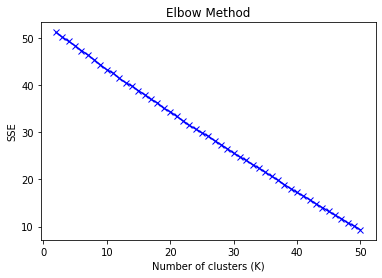

In [35]:
plt.plot(k_values, sse_values, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [36]:
# Extract the optimal value of K from the elbow chart using the elbow method
import numpy as np
distances = []
for i in range(len(sse_values) - 1):
    distances.append(sse_values[i] - sse_values[i + 1])
    optimal_k = np.argmin(distances) + 1

print("Optimal value of K: ", optimal_k)

Optimal value of K:  47


In [37]:
for i in [9,18,36,optimal_k]:
    model = KMeans(n_clusters=int(i),random_state=0)
    model.fit(features)
    k_list.append([round(silhouette_score(features, model.labels_),3),round(calinski_harabasz_score(features.toarray(), model.labels_),3),round(davies_bouldin_score(features.toarray(), model.labels_),3)])

In [38]:
k_list

[[-0.002, 1.27, 1.855],
 [-0.006, 1.214, 1.479],
 [0.013, 1.231, 1.115],
 [0.017, 1.293, 0.976]]

# Hierarchal  Cluster

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [40]:
Z = linkage(features.toarray(), method='ward')

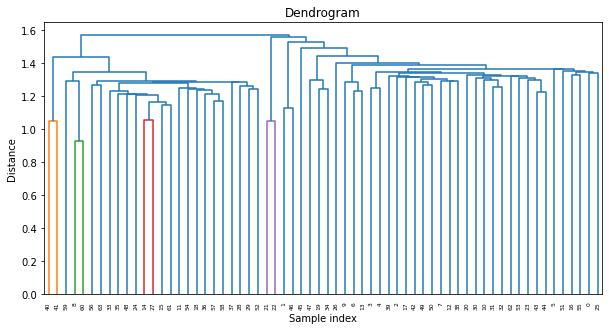

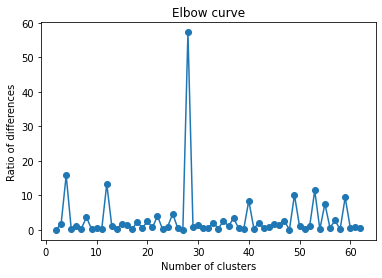

The optimal number of clusters is: 27


In [41]:
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Find the optimal number of clusters
dist = Z[:, 2]
diff = np.diff(dist)
diff_r = diff[1:] / diff[:-1]
k_opt = np.argmin(diff_r) + 2

# Plot the elbow curve
plt.plot(range(2, len(dist)), diff_r, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Ratio of differences')
plt.title('Elbow curve')
plt.show()

print("The optimal number of clusters is:", k_opt)

In [42]:
from sklearn.cluster import AgglomerativeClustering
h_list=[]
for i in [9,18,36,k_opt]:
    clustering = AgglomerativeClustering(n_clusters=int(i))
    clustering.fit(features.toarray())
    h_list.append([round(silhouette_score(features, clustering.labels_),3),round(calinski_harabasz_score(features.toarray(), clustering.labels_),3),round(davies_bouldin_score(features.toarray(),clustering.labels_),3)])

In [43]:
h_list

[[0.012, 1.374, 2.744],
 [0.009, 1.289, 1.948],
 [0.011, 1.275, 1.297],
 [0.014, 1.268, 1.524]]

## DBSCAN

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer
scorer = make_scorer(silhouette_score)

In [45]:
# Define the range of parameter values to try
eps_values = np.linspace(0.1, 2.0, 20)
min_samples_values = range(2, 5)

# Initialize variables to store the best parameter values and the best silhouette score
best_eps = None
best_min_samples = None
best_silhouette_score = -1

# Loop over all combinations of parameter values
for eps in eps_values:
    for min_samples in min_samples_values:
        
        # Fit DBSCAN clustering to the data with the current parameter values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(features)
        
        # Compute the silhouette score for the clustering result
        labels = dbscan.labels_
        if len(np.unique(labels)) > 1:  # Skip if there's only one cluster
            score = silhouette_score(features, labels)
            
            # Check if this is the best silhouette score so far
            if score > best_silhouette_score:
                best_silhouette_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameter values and the best silhouette score
print("Best Silhouette Score: {:.2f}".format(best_silhouette_score))
print("Best eps: {:.2f}".format(best_eps))
print("Best min_samples: {}".format(best_min_samples))

Best Silhouette Score: 0.09
Best eps: 1.30
Best min_samples: 2


In [46]:
# Fit DBSCAN clustering to the data with the current parameter values
dbscan = DBSCAN(eps=1.15,min_samples=1)
dbscan.fit(features)
dbscan.labels_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  8,  8, 14,
       15, 16, 17, 18, 19, 19, 20,  8, 21, 22,  8, 23,  8, 24, 25, 26, 27,
       28,  8,  8, 29, 30, 31,  8,  8, 32, 33,  8, 34,  1, 35,  8, 36, 37,
       38, 39, 40,  8, 41, 42,  8,  8, 43,  8,  8, 44, 45], dtype=int64)

In [47]:
dbscan_score = [round(silhouette_score(features, dbscan.labels_),3),round(calinski_harabasz_score(features.toarray(), dbscan.labels_),3),round(davies_bouldin_score(features.toarray(),dbscan.labels_),3)]

In [48]:
dbscan_score

[0.014, 1.255, 0.903]

In [49]:
scoredf = pd.DataFrame(columns=["Algorithms","k=9","k=18","k=36","Optimal k"])
scoredf = scoredf.append({"Algorithms":"Kmeans","k=9":k_list[0],"k=18":k_list[1],"k=36":k_list[2],"Optimal k":k_list[3]},ignore_index=True)
scoredf = scoredf.append({"Algorithms":"Hirearchichal","k=9":h_list[0],"k=18":h_list[1],"k=36":h_list[2],"Optimal k":h_list[3]},ignore_index=True)
scoredf = scoredf.append({"Algorithms":"DBSCAN","k=9":"X","k=18":"X","k=36":"X","Optimal k":dbscan_score},ignore_index=True)

C:\Users\Rohan\AppData\Local\Temp\ipykernel_2740\850501287.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoredf = scoredf.append({"Algorithms":"Kmeans","k=9":k_list[0],"k=18":k_list[1],"k=36":k_list[2],"Optimal k":k_list[3]},ignore_index=True)
C:\Users\Rohan\AppData\Local\Temp\ipykernel_2740\850501287.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoredf = scoredf.append({"Algorithms":"Hirearchichal","k=9":h_list[0],"k=18":h_list[1],"k=36":h_list[2],"Optimal k":h_list[3]},ignore_index=True)
C:\Users\Rohan\AppData\Local\Temp\ipykernel_2740\850501287.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoredf = scoredf.append({"Algorithms":"DBSCAN","k=9":"X","k=18":"X","k=36":"X","Optimal k":dbscan_score},ignore_

In [50]:
scoredf


,Algorithms,k=9,k=18,k=36,Optimal k
0,Kmeans,"[-0.002, 1.27, 1.855]","[-0.006, 1.214, 1.479]","[0.013, 1.231, 1.115]","[0.017, 1.293, 0.976]"
1,Hirearchichal,"[0.012, 1.374, 2.744]","[0.009, 1.289, 1.948]","[0.011, 1.275, 1.297]","[0.014, 1.268, 1.524]"
2,DBSCAN,X,X,X,"[0.014, 1.255, 0.903]"


#### How did you approach finding the optimal k?

Elbow method:
The elbow method is a commonly used heuristic to determine the optimal number of clusters. It involves plotting the sum of squared distances of each point in a cluster to its centroid (also known as the inertia) against the number of clusters k. The idea is to look for a point where the reduction in inertia begins to level off. This point is often referred to as the elbow point.

Silhouette method:
The silhouette method is another popular approach for determining the optimal number of clusters. It involves calculating a silhouette score for each data point, which measures how similar it is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, with values closer to 1 indicating better clustering. The optimal number of clusters is the one that maximizes the average silhouette score across all data points.

Gap statistic:
The gap statistic is a statistical approach for determining the optimal number of clusters. It involves comparing the within-cluster dispersion to a reference distribution of randomly generated data. The optimal number of clusters is the one that maximizes the gap between the within-cluster dispersion and the reference distribution.

Hierarchical clustering:
Hierarchical clustering is another method that can be used to determine the optimal number of clusters. It involves creating a dendrogram that shows the hierarchical relationships between data points. The optimal number of clusters can be determined by cutting the dendrogram at a particular height, which corresponds to the desired number of clusters.

These are some of the commonly used approaches for determining the optimal number of clusters in k-means clustering. However, it is important to note that the choice of the optimal number of clusters ultimately depends on the specific problem and domain knowledge

#### What algorithm do you believe is the best? Why?

Kmeans which is showing best Calinski and Harabasz score, and Davies-Bouldin score & Silhouette score compare to other two methods

### Add Cluster ID to output file
In your data structure, add the cluster id for each smart city respectively. Show the to append the clusterid code below.

### Save Model

After finding the best model, it is desirable to have a way to persist the model for future use without having to retrain. Save the model using [model persistance](https://scikit-learn.org/stable/model_persistence.html). This model should be saved in the same directory as this notebook and should be loaded as the model for your `project3.py`.

Save the model as `model.pkl`. You do not have to use pickle, but be sure to save the persistance using one of the methods listed in the link.

In [52]:
kmeans = KMeans(n_clusters=k_opt)
model = kmeans.fit(features.toarray())

In [86]:
Smart_City_Df2['cluster_id'] = model.labels_

In [164]:
import pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(tfidf,files)
    pickle.dump(model,files)
    

## Derving Themes and Concepts

Perform Topic Modeling on the cleaned data. Provide the top five words for `TOPIC_NUM = Best_k` as defined in the section above. Feel free to reference [Chapter 6](https://github.com/dipanjanS/text-analytics-with-python/tree/master/New-Second-Edition/Ch06%20-%20Text%20Summarization%20and%20Topic%20Models) for more information on Topic Modeling and Summarization.

In [53]:
%%time
import nltk

stop_words = nltk.corpus.stopwords.words('english')
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

def normalize_corpus(paper):
    norm_papers = []
 
    paper = paper.lower()
    paper_tokens = [token.strip() for token in wtk.tokenize(paper)]
    paper_tokens = [wnl.lemmatize(token) for token in paper_tokens if not token.isnumeric()]
    paper_tokens = [token for token in paper_tokens if len(token) > 1]
    paper_tokens = [token for token in paper_tokens if token not in stop_words]
    paper_tokens = list(filter(None, paper_tokens))
    if paper_tokens:
        norm_papers.append(paper_tokens)

    return norm_papers
    

CPU times: total: 93.8 ms
Wall time: 18 ms


In [54]:
Smart_City_Df2['token_clean'] = Smart_City_Df2['clean'].apply(normalize_corpus)

In [625]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [55]:
from collections.abc import Mapping
import gensim
import gensim
from gensim import corpora

In [155]:
# Preprocess the text data
processed_docs = Smart_City_Df2['clean text'].apply(gensim.utils.simple_preprocess)

# Create a Gensim dictionary from the processed data
dictionary = corpora.Dictionary(processed_docs)

# Create a Gensim corpus from the dictionary and processed data
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Perform a Gensim topic model analysis on the corpus
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=12,
                                            random_state=42)

# Store the results back into the pandas dataframe
Smart_City_Df2['topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

In [652]:
def topic_function(x):
    processed_docs = x

    # Create a Gensim dictionary from the processed data
    dictionary = corpora.Dictionary(processed_docs)

    # Create a Gensim corpus from the dictionary and processed data
    corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

    # Perform a Gensim topic model analysis on the corpus
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=12,
                                                random_state=42)
    
    return  [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]


In [57]:
Smart_City_Df2['topic'] = [sorted(lda_model[doc], key=lambda x: x[1], reverse=True)[:2] for doc in corpus]
list_topics = []
for i in Smart_City_Df2.topic2:
    temp_topics = []
    for j in i:
        temp_topics.append("T"+str(j[0]))
    list_topics.append(temp_topics)
Smart_City_Df2['T'] = list_topics

In [58]:
Smart_City_Df2['topic'].head(1)

1    11
Name: topic, dtype: int64

In [666]:
Smart_City_Df2['topic2'] =  topic_function(Smart_City_Df2['clean text'].apply(gensim.utils.simple_preprocess))

### Extract themes
Write a theme for each topic (atleast a sentence each).

In [59]:
pd.options.display.max_colwidth = 500

In [60]:
Smart_City_Df2.loc[Smart_City_Df2['topic']==1][1:2].clean

6    office mayor mary casilas salas february yous department transportation usdot federal highway administration fhwa office acquisition grants management new jersey avenue se mail drop e washington dc atn sarah tarpgard hcfa traffic smart city challenge smart city chula vista dear ms tarpgard pleased present smart city chula vista application submission includes citys vision traffic address citys significant traffic related challenges chula vista uniquely positioned dynamics people landuse infr...
Name: clean, dtype: object

In [61]:
#Topic 1
Smart_City_Df2.loc[Smart_City_Df2['topic']==1][1:2].clean

6    office mayor mary casilas salas february yous department transportation usdot federal highway administration fhwa office acquisition grants management new jersey avenue se mail drop e washington dc atn sarah tarpgard hcfa traffic smart city challenge smart city chula vista dear ms tarpgard pleased present smart city chula vista application submission includes citys vision traffic address citys significant traffic related challenges chula vista uniquely positioned dynamics people landuse infr...
Name: clean, dtype: object

In [62]:
#Topic 2
Smart_City_Df2.loc[Smart_City_Df2['topic']==2][1:2].clean

51    city akron p g e traffic smart city challenge akron ohio challenge statement akron city innovation continually reinventing elf economy continues evolve today city people infrastru cture built people unlike yous cities akrons challenge build infrastructure ac comodate people cars overbuilt infrastructure city major challenges surrounding adequate attractive transportation downtown inner core neighborhoods market ing downtown parking options properly citys challenge smarter efficient effective...
Name: clean, dtype: object

In [63]:
#Topic 5
Smart_City_Df2.loc[Smart_City_Df2['topic']==5][1:2].clean

23    traffic smart tampa vision ibeyond traffic smart tampa vision ii welcome tampa tampa rd largest city state florida metropolitan heartbeat tampa bay region million people tampa city resilience city built determination immigrants cuba italy spain south central americas scotland thousands came tampa search prosperity safety equal opportunity early architects great city brought tampa valuable sought brought vision motivation laid groundwork better tomorrow vision building today journey small por...
Name: clean, dtype: object

### Add Topid ID to output file
Add the top two topics for each smart city to the data structure.

In [64]:
pd.options.display.max_colwidth = 50

In [65]:
Smart_City_Df2['topics'] = [sorted(lda_model[doc], key=lambda x: x[1], reverse=True)[:2] for doc in corpus]
list_topics = []
for i in Smart_City_Df2.topics:
    temp_topics = []
    for j in i:
        temp_topics.append("T"+str(j[0]))
    list_topics.append(temp_topics)
Smart_City_Df2['topics'] = list_topics

In [159]:
Smart_City_Df2.head()

,city,raw text,clean text,clusterid,topicids,summary,keywords
1,AK Anchorage,CONTENTS \n1 VISION .............................,contents vision population characteristics sit...,12,"[T11, T0]",anchorage data architecture ict smart vision o...,anchorages municipality anchorage municipal mu...
2,AL Birmingham,aBirmingham\nRising\nBirmingham Rising! Meetin...,abirmingham rising birmingham rising meeting c...,3,"[T1, T0]",city birmingham transporta es smart ons data n...,city citys birmingham birminghams transporta o...
3,AL Montgomery,U.S. Department of Transportation - “BEYOND TR...,yous department transportation traffic smart c...,10,"[T1, T7]",montgomery city data smart system transit publ...,montgomery montgomerys cities citys smart city...
4,AZ Scottsdale AZ,Federal Agency Name: U.S. Department of Tran...,federal agency yous department transportation ...,8,"[T6, T7]",city transportation scotsdale system data ariz...,citys cities transportation transported transp...
5,AZ Tucson,Tucson Smart City Demonstration Proposal\nPart...,tucson smart city demonstration proposal visio...,25,"[T8, T5]",tucson city smart data arizona demonstration v...,tucsons tucsone data tucson smart city citys c...


## Gathering Applicant Summaries and Keywords

For each smart city applicant, gather a summary and keywords that are important to that document. You can use gensim to do this. Here are examples of functions that you could use.

```python

from gensim.summarization import summarize

def summary(text, ratio=0.2, word_count=250, split=False):
    return summarize(text, ratio= ratio, word_count=word_count, split=split)
    
from gensim.summarization import keywords

def keys(text, ratio=0.01):
    return keywords(text, ratio=ratio)
```

### Add Summaries and Keywords
Add summary and keywords to output file.

In [637]:
!pip install gensim==3.6.0

In [67]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from collections import Counter

In [68]:
def summarize_text(text):
    # tokenize the text into individual words
    words = nltk.word_tokenize(text)

    # remove stop words such as 'a', 'the', 'is', etc.
    stopwords = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.lower() not in stopwords]

    # count the frequency of each word
    word_freq = Counter(words)

    # get the 5 most common words and phrases
    summary = [word for word, _ in word_freq.most_common(100)]

    # join the summary words into a single sentence
    summary = ' '.join(summary)

    return summary


In [69]:
Smart_City_Df2['summary'] = Smart_City_Df2['clean'].apply(summarize_text)

In [70]:
from gensim.summarization import keywords

def keys(text, ratio=0.01):
    return keywords(text, ratio=ratio).replace('\n',' ')

In [71]:
Smart_City_Df2['keywords'] = Smart_City_Df2['clean'].apply(keys)

In [90]:
Smart_City_Df2.head()

,city,raw text,clean text,clusterid,topicids,summary,keywords
1,AK Anchorage,CONTENTS \n1 VISION .............................,contents vision population characteristics sit...,12,"[T11, T0]",anchorage data architecture ict smart vision o...,anchorages municipality anchorage municipal mu...
2,AL Birmingham,aBirmingham\nRising\nBirmingham Rising! Meetin...,abirmingham rising birmingham rising meeting c...,3,"[T1, T0]",city birmingham transporta es smart ons data n...,city citys birmingham birminghams transporta o...
3,AL Montgomery,U.S. Department of Transportation - “BEYOND TR...,yous department transportation traffic smart c...,10,"[T1, T7]",montgomery city data smart system transit publ...,montgomery montgomerys cities citys smart city...
4,AZ Scottsdale AZ,Federal Agency Name: U.S. Department of Tran...,federal agency yous department transportation ...,8,"[T6, T7]",city transportation scotsdale system data ariz...,citys cities transportation transported transp...
5,AZ Tucson,Tucson Smart City Demonstration Proposal\nPart...,tucson smart city demonstration proposal visio...,25,"[T8, T5]",tucson city smart data arizona demonstration v...,tucsons tucsone data tucson smart city citys c...


In [79]:
Smart_City_Df2.rename(columns={'City':'city','Text':'raw text','clean':'clean text','cluster_id':'clusterid','topics':'topicids'},inplace=True)

In [73]:
Smart_City_Df2.drop(['token_clean','topic'],inplace=True,axis=1)

## Write output data

The output data should be written as a TSV file.
You can use `to_csv` method from Pandas for this if you are using a DataFrame.

`Syntax: df.to_csv('file.tsv', sep = '')` \
`df.to_csv('smartcity_eda.tsv', sep='\t')`

In [141]:
Smart_City_Df2.to_csv('smartcity_eda.tsv', sep='\t',index=False)

In [2]:
import pandas as pd
smartcity_predict = pd.DataFrame(columns=['city','raw text','clean text','clusterid','summary','keywords'])

In [3]:
smartcity_predict.to_csv('smartcity_predict.tsv',sep='\t',index=False)

# Moving Forward
Now that you have explored the dataset, take the important features and functions to create your `project3.py`.
Please refer to the project spec for more guidance.
